# LeNet vs AlexNet
Create architecture from scratch<br>
Data similar with dataset from https://www.kaggle.com/rbarman/resnet50-transfer-learning
And not from new competition https://www.kaggle.com/c/rock-paper-scissors/overview

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-11-27 15:22:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.12.240, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   170MB/s    in 1.1s    

2020-11-27 15:22:51 (170 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-11-27 15:22:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 172.217.7.208, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-

Unzip our archive

In [1]:
import os
import zipfile

local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rps/')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rps/')
zip_ref.close()

Checking our data

In [2]:
rock_dir = os.path.join('/rps/rps/rock')
paper_dir = os.path.join('/rps/rps/paper')
scissors_dir = os.path.join('/rps/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


Show images

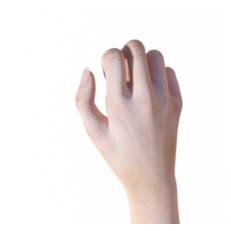

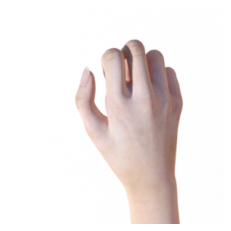

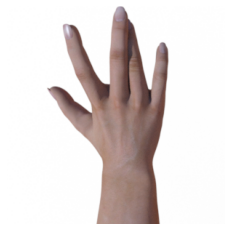

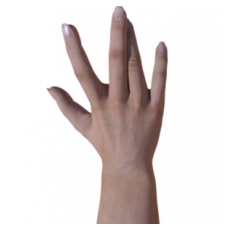

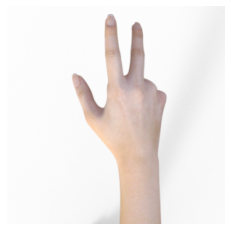

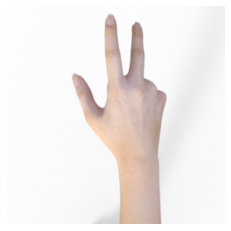

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Augementation dataset

In [5]:
TRAINING_DIR = "/rps/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/rps/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


LeNet architecture

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(6, (5,5), activation='tanh', input_shape=(150, 150, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    # The second convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    # 120 neuron hidden layer
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 34, 34, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               2219640   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Train our network

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=20, 
                    validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/10
20/20 [==============================] - 30s 1s/step - loss: 1.6260 - accuracy: 0.3308 - val_loss: 1.1126 - val_accuracy: 0.3333
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 1.1186 - accuracy: 0.3389 - val_loss: 1.1404 - val_accuracy: 0.3333
Epoch 3/10
20/20 [==============================] - 29s 1s/step - loss: 1.1286 - accuracy: 0.3307 - val_loss: 1.1139 - val_accuracy: 0.3333
Epoch 4/10
20/20 [==============================] - 30s 1s/step - loss: 1.1316 - accuracy: 0.3047 - val_loss: 1.1145 - val_accuracy: 0.3333
Epoch 5/10
20/20 [==============================] - 28s 1s/step - loss: 1.1260 - accuracy: 0.3112 - val_loss: 1.1171 - val_accuracy: 0.3333
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 1.1118 - accuracy: 0.3502 - val_loss: 1.1091 - val_accuracy: 0.3333
Epoch 7/10
20/20 [==============================] - 31s 2s/step - loss: 1.1167 - accuracy: 0.3299 - val_loss: 1.1108 - val_accuracy: 0.3333
Epoch 8/10
20/20 [==

Display our network

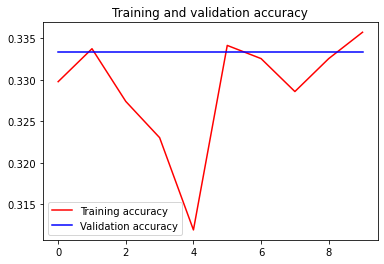

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Task 
Create AlexNet network and compare result with LeNet.<br>
https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf <br>

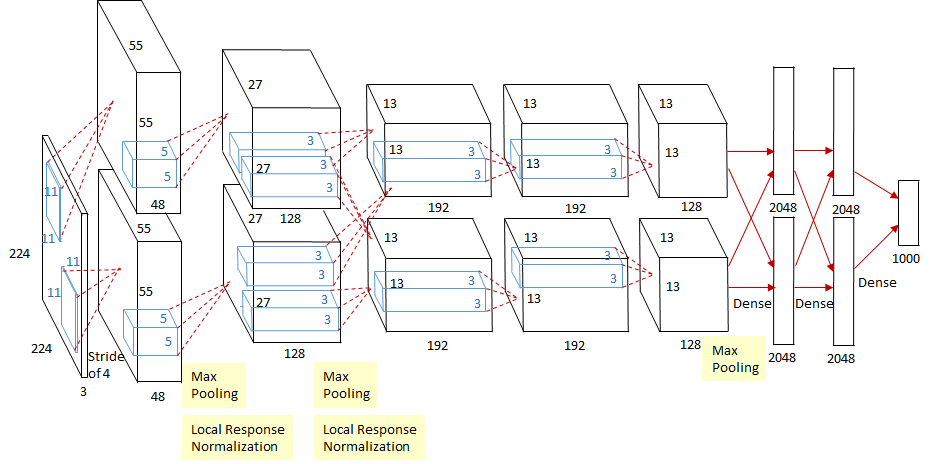

In [9]:
#first I need to import needed libs
#note: I work with keras-gpu right now, so basically everything should be imported from keras here
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
#tenserflow would be backend

In [10]:
#I think you know about tesorboard
#right now I am getting to know it - so in this lab i used too

#first create location of my log
root_logdir = os.path.join(os.curdir, "logs\\fit\\")

#fuction to get it
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
#after it, i run the function to get my  log
run_logdir = get_run_logdir()
#where i call it and save as callback for later use
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [11]:
#Architecture is here form scratch
#see, i changed the input shape, and kernel size, pool size to get the same modle as been shown as example before
model_alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(4,4), activation='relu', input_shape=(592,592,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=96, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [12]:
#here is the model i created, same as it was given
model_alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 96)      384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 73, 73, 96)        230496    
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 36, 96)       

In [13]:
#yet because i changed the input size - i need to do pre-processing once again
#i change the train/target size to 592
#as well batch size or else you would have problem as OOM - it is too much memory use
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(592, 592),
	class_mode='categorical',
  batch_size=16
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(592, 592),
	class_mode='categorical',
  batch_size=16
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
#compile model before fitting
model_alexnet.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#fit for new history, yet see i added callback the one i createwd before for tensorboard use
history2 = model_alexnet.fit(train_generator, epochs=10, steps_per_epoch= 20, validation_data = validation_generator,
                             verbose = 1, validation_steps= 10, callbacks=[tensorboard_cb])
#Note: it might take some time - because of large input size as well creating data to use and new model

Epoch 1/10
20/20 [==============================] - 72s 3s/step - loss: 147.2106 - accuracy: 0.3046 - val_loss: 6.6514 - val_accuracy: 0.3438
Epoch 2/10
20/20 [==============================] - 78s 4s/step - loss: 22.2917 - accuracy: 0.4231 - val_loss: 5.6192 - val_accuracy: 0.3375
Epoch 3/10
20/20 [==============================] - 66s 3s/step - loss: 13.1031 - accuracy: 0.3995 - val_loss: 6.1107 - val_accuracy: 0.3250
Epoch 4/10
20/20 [==============================] - 64s 3s/step - loss: 7.9282 - accuracy: 0.4222 - val_loss: 5.5902 - val_accuracy: 0.3500
Epoch 5/10
20/20 [==============================] - 58s 3s/step - loss: 2.8394 - accuracy: 0.4952 - val_loss: 11.3338 - val_accuracy: 0.3250
Epoch 6/10
20/20 [==============================] - 59s 3s/step - loss: 2.3177 - accuracy: 0.4170 - val_loss: 15.6569 - val_accuracy: 0.3313
Epoch 7/10
20/20 [==============================] - 68s 3s/step - loss: 1.9104 - accuracy: 0.4559 - val_loss: 1.4376 - val_accuracy: 0.3187
Epoch 8/10
20/

In [17]:
!kill 24044

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
#here i call for tenserboard with magic fucntion and load my data (i have newwer version of TF)
%reload_ext tensorboard
%tensorboard --logdir logs/fit
#feel free to see and use tenserboard below as you desire

Reusing TensorBoard on port 6006 (pid 18452), started 0:01:45 ago. (Use '!kill 18452' to kill it.)

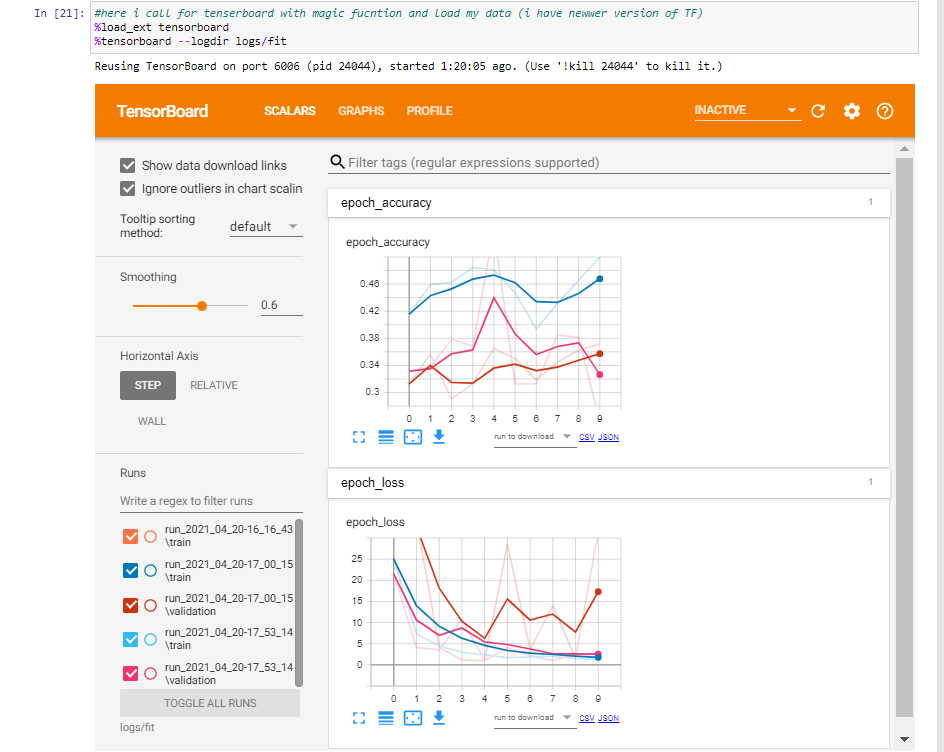

In [19]:
#also i added screenshot of how it looks in my notebook, so just in case if doesnot open/support in/on your computer 
from PIL import Image
#used pillow to open screenshot
im = Image.open("tensorboard in open terminal with alexnet.png")
im

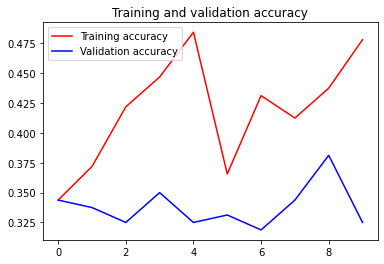

<Figure size 432x288 with 0 Axes>

In [20]:
#but if you dont have tensorboard here is the plot of graphs with same code as above
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
#lets evaluate my model and see the outcome
model_alexnet.evaluate(train_generator)

158/158 [==============================] - 296s 2s/step


[0.8851933479309082, 0.3503968119621277]

<Figure size 432x288 with 0 Axes>

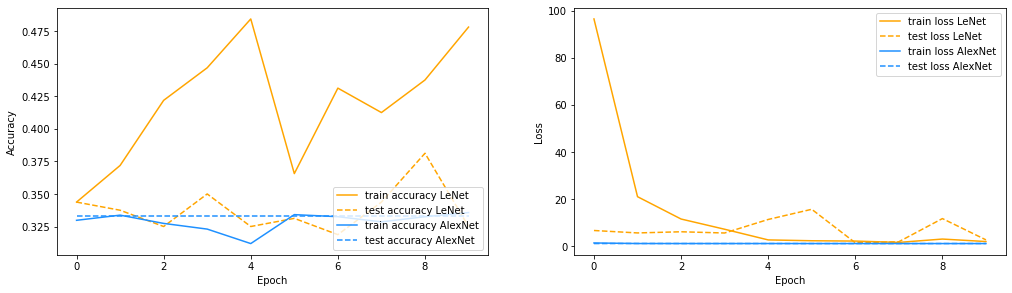

In [21]:
#compare LeNEt and AlexNet model
#opposing accuracy first
fig = plt.figure()
fig.patch.set_facecolor('white')
fig= plt.subplots(nrows=1, ncols=2, figsize=(17, 10))
plt.subplot(2, 2, 1)
plt.plot(history2.history['accuracy'],
         label='train accuracy LeNet',
         c='orange', ls='-')
plt.plot(history2.history['val_accuracy'],
         label='test accuracy LeNet',
         c='orange',ls='--')

plt.plot(history.history['accuracy'],
         label='train accuracy AlexNet',
         c='dodgerblue', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy AlexNet',
         c='dodgerblue', ls='--')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#comparing the loss
plt.subplot(2, 2, 2)
plt.plot(history2.history['loss'],
         label='train loss LeNet',
         c='orange', ls='-')
plt.plot(history2.history['val_loss'],
         label='test loss LeNet',
         c='orange',ls='--')

plt.plot(history.history['loss'],
         label='train loss AlexNet',
         c='dodgerblue', ls='-')
plt.plot(history.history['val_loss'],
         label='test loss AlexNet',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Note 
I actually did lab 9 and 10, yet could not upload it hence the whole day the acces were closed. and as my groupmates said it opened only at night. I went to sleep at ~22 o'clock, since I got terrible high temperature - I still did not fully recover from got sick with covid(I caught in the end of march, hence i did poorly on my lab works as lab 8), i was taken to hospital and only returned to my home on 16th and were a bit off after it, to say so. so, just in case, i did lab 9 and 10.

## Summary 
In this lab work we mainly wrote form scratch AlexNet model and compered the results of each model. So far what can I say? When I was writing new model, I followed tutorials online to understand mainly what AlexNet architecture is. Here are my outcomes: AlexNet showed that deep convolutional neural network can be used for solving image classification; simplest methods to approach to grasp DL concepts and techniques. <br>
In the end, about AlexNet and LeNet:
- LeNet is simple and straightforward, also classical model for CNN, has 60K parameters and use wo pairs of Convolution layer with stride 2 and Average pooling layer with stride 1<br>
- AlexNet, on the other hand, is similar to LeNet, yet a bit deeper with layers(8) and has more filters, stacked convolutional layers, max pooling, dropout, data augmentation, ReLU and SGD, but major drawback - it comprises of too many hyper-parameters. <br>


### My Learning outcomes 
I used keras, tesorflow, matpoitlib and tensorboard, since I got introduced to it when I was upgrading TF. I learned how to write from scratch new model:<br> 
- the types of layers AlexNet is consist of:
   - convolution, batch normalisation, max polling, flatten and dense layers and also activation functions can be added such as ReLU, softmax, dropout<br>
- the difference between epochs vs batch vs iterations:
   - epoch is one bypass of entire dataset -> batch size is total amount of present training samples -> iteration is number of bathces need to complete epochs;<br>
- used tensorboard to plot graphs: 
   - it provides better visualisation and monitoring mechanism of training performance;
   - can be downloaded to conda and then use it in open terminal with magic function
- ran into new errors such as OOM and understood what to do: 
   - Decrease the number of filters in your Dense, Conv2D layers<br>
   - Use a smaller batch_size (or increase steps_per_epoch and validation_steps)<br>
   - Use grayscale images (you can use tf.image.rgb_to_grayscale)<br>
   - Reduce the number of layers<br>
   - Use MaxPooling2D layers after convolutional layers<br>
